# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

In [305]:
using Plots

In [158]:
"""5
    Dual

Definición de los números duales. Los campos internos son
    x  :: Float64   # valor de la función
    x′ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x′ :: Float64
end

Dual

In [308]:
import Base: +, -, *, /, ^

### (a) Suma

In [309]:
+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)

+(a::Real, v::Dual) = Dual( a + v.x, v.x′)

+(u::Dual, a::Real) = Dual( u.x + a, u.x′)

+ (generic function with 203 methods)

### (b) Resta

In [310]:
-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)

-(a::Real, v::Dual) = Dual( a - v.x, - v.x′)

-(u::Dual, a::Real) = Dual( u.x - a, u.x′)

- (generic function with 225 methods)

### (c) Producto

In [331]:
*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

*(a::Real, v::Dual) = Dual( a * v.x, a * v.x′)

*(u::Dual, a::Real) = Dual( u.x * a, u.x′ * a)

* (generic function with 222 methods)

### (d) Cociente

In [332]:
function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

/ (generic function with 92 methods)

In [333]:
/(a::Real, v::Dual) = Dual(a / v.x, (-(a / v.x) * v.x′)/v.x)

/(u::Dual, a::Real) = Dual(u.x / a, (u.x′ / a))

/ (generic function with 92 methods)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [334]:
using Base.Test

### (a) Suma

In [335]:
@test Dual(1234, 5678) + Dual(4444, -4444) == Dual(5678, 1234)

Test Passed

In [336]:
@test Dual(pi, pi^4) + Dual(pi^4, -pi) == Dual(pi^4 + pi, pi^4 - pi)

Test Passed

### (b) Resta

In [337]:
@test Dual(1234, 5678) - Dual(-4444, 4444) == Dual(5678, 1234)

Test Passed

In [338]:
@test Dual(234, 789) - Dual(111, 111) == Dual(123, 678)

Test Passed

### (c) Producto

In [339]:
f(x) = 2x + 8

f (generic function with 1 method)

In [340]:
f′(x) = 2

f′ (generic function with 1 method)

In [341]:
g(x) = 4x^2 + 8x + 1

g (generic function with 1 method)

In [342]:
g′(x) = 8x + 8

g′ (generic function with 1 method)

In [343]:
@test Dual(f(1), f′(1)) * Dual(g(1), g′(1)) == Dual(f(1)*g(1), f′(1)*g(1) + f(1)*g′(1))

Test Passed

In [344]:
@test Dual(f(-3), f′(-3)) * 2 == Dual(4, 4)

Test Passed

### (d) Cociente

In [176]:
@test Dual(f(1), f′(1)) / Dual(g(1), g′(1)) == Dual(f(1)/g(1), (f′(1)*g(1) - f(1)*g′(1))/ g(1)^2)

Test Passed

In [177]:
@test Dual(f(1.5), f′(1.5)) / 5 == Dual( f(1.5)/5, ((f′(1.5)*5)/ 5^2))

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [178]:
import Base:show

In [179]:
### Definiendo funcion show ###

function show(io::IO, u::Dual)
    if u.x′ < 0
        print(u.x, " - ",abs(u.x′)," ε " )
    else 
        print(u.x," + ",u.x′," ε ")
    end
end

show (generic function with 273 methods)

In [180]:
### Probando la funcion show ###

Dual(pi^4, -pi^8 + 1)

97.40909103400243 - 9487.531016070572 ε 

## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

#### (a) Definición de `Dual` de una constante numérica

In [185]:
Dual(c::Real) = Dual(c, 0.0)

Dual

#### (b) Definición de `Dual` para la variable independiente $x$ en $x_0$

In [186]:
dual(x0::Real) = Dual(x0, 1.0)

dual (generic function with 1 method)

#### (c) Obtención de la derivada de $g(x)$

Definimos la variable $z$ de modo que $Pn$ se comporte como la función identidad. 

In [194]:
z = dual(1)

1.0 + 1.0 ε 

Definimos ahora dos funciones, $r(x)$ como el numerador de $g(x)$, y $s(x)$ como el denominador de $g(x)$.

In [199]:
r(x) = 3x^2 - 8x + 5

r (generic function with 1 method)

In [200]:
s(x) = 7x^3 - 1

s (generic function with 1 method)

Evaluamos $r(x)$ y $s(x)$ en $z$.

In [190]:
dual_1 = r(z)

0.0 - 2.0 ε 

In [192]:
dual_2 = s(z)

6.0 + 21.0 ε 

Finalmente, obtemenos la derivada  $g\prime(x)$ utilizando para ello la definición de "Cociente de duales", específicamente la segunda componente del dual resultante

In [201]:
Derivada_cociente = dual_1 / dual_2

0.0 - 0.3333333333333333 ε 

La derivada $g\prime(x)$ es igual a -0.33333333...

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

In [208]:
import Base: sqrt, exp, log, sin, cos, sinh, cosh 

### (a) Definición de las operaciones con Duales

In [209]:
sqrt(u::Dual) = Dual(sqrt(u.x), (u.x′)/2(sqrt(u.x)))

sqrt (generic function with 11 methods)

In [210]:
exp(u::Dual) = Dual(exp(u.x), u.x′*exp(u.x))

exp (generic function with 11 methods)

In [211]:
log(u::Dual) = Dual(log(u.x), u.x′ / u.x)

log (generic function with 19 methods)

In [214]:
sin(u::Dual) = Dual(sin(u.x), u.x′ * cos(u.x))

sin (generic function with 11 methods)

In [215]:
cos(u::Dual) = Dual(cos(u.x), u.x′ * (-sin(u.x)))

cos (generic function with 11 methods)

In [216]:
sinh(u::Dual) = Dual(sinh(u.x), u.x′ * cosh(u.x))

sinh (generic function with 12 methods)

In [217]:
cosh(u::Dual) = Dual(cosh(u.x), u.x′ * sinh(u.x))

cosh (generic function with 12 methods)

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

### (A) Método de Newton con Duales

In [297]:
doc"""
    newton(f, x0, n_iter)
Devuelve las raíces de la función `f` cuyas entradas son un número `Dual`.

"""
function newton_dual(f, x0, n_iter::Int64=1000)
    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        a = dual(x_n)
        z = f(a)
        x_nn = x_n - (z.x / z.x′)
        x_n = x_nn
    end
    return float(x_nn)
end

newton_dual

### (B) Polinomio de Wilkinson

In [298]:
W_6(x) = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)

W_6 (generic function with 1 method)

#### (i) Iterado inicial $x_0=2.2$

In [299]:
x0 = 2.2

iters = 1:2:1000
raices_1 = []

for n_iter in iters
    raiz = newton_dual(W_6, x0, n_iter)
    push!(raices_1, raiz)
end

#### (ii) Iterado inicial $x_0=2.45$

In [300]:
x0 = 2.45

iters = 1:2:1000
raices_2 = []

for n_iter in iters
    raiz = newton_dual(W_6, x0, n_iter)
    push!(raices_2, raiz)
end

#### (iii) Raíces de $W_{6}(x)$

In [301]:
rango_x0 = -100:100

n_iter = 1000
raices_3 = []

for x0 in rango_x0
    raiz = newton_dual(W_6, x0, n_iter)
    push!(raices_3, raiz)
end

In [302]:
unique(raices_3)

6-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0

### (C) Función $g(x)=x sin(2x)$

In [303]:
g(x) = x*sin(2x)

x0 = 0.7

iters = 1:2:1000
raices_g = []

for n_iter in iters
    raiz = newton_dual(g, x0, n_iter)
    push!(raices_g, raiz)
end

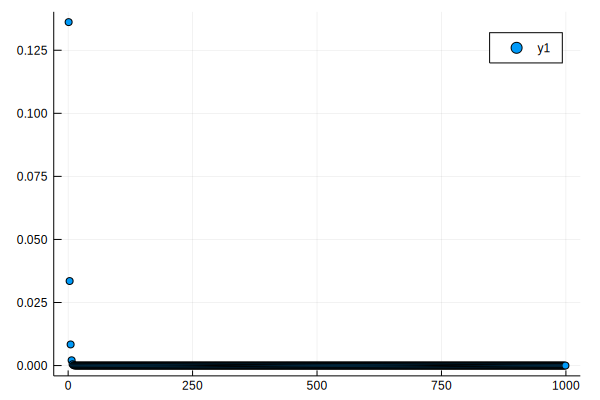

In [306]:
scatter(iters, raices_g)

In [304]:
unique(raices_g)

269-element Array{Float64,1}:
 0.136151    
 0.0335081   
 0.00836917  
 0.00209217  
 0.000523041 
 0.00013076  
 3.269e-5    
 8.17251e-6  
 2.04313e-6  
 5.10782e-7  
 1.27695e-7  
 3.19239e-8  
 7.98097e-9  
 ⋮           
 2.49665e-156
 6.24163e-157
 1.56041e-157
 3.90102e-158
 9.75254e-159
 2.43814e-159
 6.09534e-160
 1.52385e-160
 3.80958e-161
 9.53945e-162
 2.40777e-162
 4.8789e-163 

## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba